In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
print("Package Loaded")

Package Loaded



Type of 'train_X' is <type 'numpy.ndarray'>
Shape of 'train_X' is (1, 20)
("Type of 'train_Y' is ", <type 'numpy.ndarray'>)
("Shape of 'train_Y' is", (1, 20))


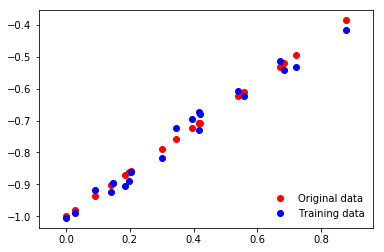

In [2]:
np.random.seed(1)
def f(x, a, b):
    n = train_X.size
    vals = np.zeros((1, n))
    for i in range(0, n):
        ax = np.multiply(a, x.item(i))
        val = np.add(ax, b)
        vals[0, i] = val
    return vals

Wref = 0.7
bref = -1.
n = 20
noise_var = 0.001
train_X = np.random.random((1, n))
ref_Y = f(train_X, Wref, bref)
train_Y = ref_Y + np.sqrt(noise_var)*np.random.randn(1, n)
n_samples = train_X.size

print ""
print "Type of 'train_X' is %s" % type(train_X)
print "Shape of 'train_X' is", train_X.shape
print ("Type of 'train_Y' is ", type(train_Y))
print ("Shape of 'train_Y' is", train_Y.shape)

plt.figure(1)
plt.plot(train_X[0, :], ref_Y[0, :], 'ro', label='Original data')
plt.plot(train_X[0, :], train_Y[0, :], 'bo', label='Training data')
plt.axis('equal')
plt.legend(loc='lower right')

### Hypothesis ###
$$ h(x) = W^Tx + b $$

### The cost function ###
$$ J(\theta)=\frac{1}{2m}\sum_{i=1}^m\{h(x^{(i)}) - Y^{(i)}\}^2$$

### Gradient ###
$$ \frac{\partial}{\partial b} J(\theta)=\frac{1}{m}\sum_{i=1}^m\{h(x^{(i)}) - Y^{(i)}\}$$

$$ \frac{\partial}{\partial b} J(\theta)=\frac{1}{m}\sum_{i=1}^m\{h(x^{(i)}) - Y^{(i)}\}x^{(i)}$$


In [3]:
def h(X, w, b):
    return np.add((np.multiply(w, X)), b)

def costF(X, w, b, Y):
    sqrErrors = np.power(h(X, w, b) - Y, 2)
    return np.sum(sqrErrors) / (2*n_samples)    

def gradientDescent(X, Y, w, b, alpha, num_iters):
    for i in xrange(num_iters):
        b -= np.sum(h(X, w, b) - Y) * alpha / n_samples
        w -= np.sum(np.multiply(h(X, w, b) - Y, X)) * alpha / n_samples
        if i % 1000 == 0:
            print i, b, w, costF(X, w, b, Y)
    return b, w

W = np.random.random(1)
b = np.random.random(1)

finalB, finalW = gradientDescent(train_X, train_Y, W, b, 0.01, 20000)
print finalW, finalB

0 [ 0.04356055] [ 0.48812673] 0.471112439034
1000 [-0.87866453] [ 0.37748883] 0.00320633445422
2000 [-0.92765317] [ 0.50399419] 0.00132849228361
3000 [-0.95695537] [ 0.57967796] 0.000656408329633
4000 [-0.97448539] [ 0.62495573] 0.000415867878186
5000 [-0.98497272] [ 0.65204313] 0.000329777876424
6000 [-0.99124676] [ 0.66824815] 0.00029896605929
7000 [-0.9950002] [ 0.6779428] 0.000287938436387
8000 [-0.99724569] [ 0.68374262] 0.000283991623826
9000 [-0.99858905] [ 0.68721235] 0.000282579050189
10000 [-0.99939272] [ 0.68928812] 0.000282073486713
11000 [-0.99987351] [ 0.69052995] 0.000281892544338
12000 [-1.00016115] [ 0.69127287] 0.00028182778463
13000 [-1.00033323] [ 0.69171732] 0.000281804606976
14000 [-1.00043617] [ 0.69198322] 0.000281796311638
15000 [-1.00049776] [ 0.69214229] 0.000281793342717
16000 [-1.0005346] [ 0.69223745] 0.000281792280133
17000 [-1.00055664] [ 0.69229438] 0.000281791899832
18000 [-1.00056983] [ 0.69232844] 0.000281791763721
19000 [-1.00057772] [ 0.69234882] 0

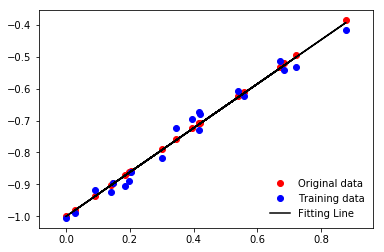

In [4]:
plt.figure(1)
plt.plot(train_X[0, :], ref_Y[0, :], 'ro', label='Original data')
plt.plot(train_X[0, :], train_Y[0, :], 'bo', label='Training data')
plt.plot(train_X[0, :], h(train_X, W, b)[0, :], 'k', label='Fitting Line')
plt.axis('equal')
plt.legend(loc='lower right')